# 数据集：Iris鸢尾花

## 加载数据集并转为DataFrame

In [20]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimSun']  # Windows
plt.rcParams['axes.unicode_minus'] = False


iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['种类'] = iris.target

iris_df['种类'] = iris_df['种类'].map({0: '山鸢尾', 1: '变色鸢尾', 2: '弗吉尼亚鸢尾'})

## 导出为Excel文件

In [8]:
iris_df.to_excel("iris_dataset.xlsx",index=False)

## 预处理

In [9]:
import pandas as pd

# 读取Excel文件（注意使用原始字符串 r）
df = pd.read_excel("C:\learn\数据分析\iris_dataset.xlsx")

# 仅对数值列填充均值（排除分类列）
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# 检查结果
print(df.isnull().sum())  # 确认无缺失值

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
种类                   0
dtype: int64


## 描述性统计分析

In [18]:
# 按类别分组统计（修正多级列名）
grouped_stats = iris_df.groupby('种类').agg(['mean', 'std'])

# 压缩多级列名为单层（解决截图中的列名错位）
grouped_stats.columns = ['_'.join(col).strip() for col in grouped_stats.columns.values]

# 美化表格样式
styled_table = grouped_stats.style\
    .format("{:.2f}")\
    .background_gradient(cmap='Blues', subset=['sepal length (cm)_mean', 'petal length (cm)_mean'])\
    .set_caption("鸢尾花分类统计表（优化版）")\
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '16px'), ('color', 'darkblue')]
    }])
display(styled_table)

,sepal length (cm)_mean,sepal length (cm)_std,sepal width (cm)_mean,sepal width (cm)_std,petal length (cm)_mean,petal length (cm)_std,petal width (cm)_mean,petal width (cm)_std
种类,,,,,,,,
变色鸢尾,5.94,0.52,2.77,0.31,4.26,0.47,1.33,0.20
山鸢尾,5.01,0.35,3.43,0.38,1.46,0.17,0.25,0.11
弗吉尼亚鸢尾,6.59,0.64,2.97,0.32,5.55,0.55,2.03,0.27


## 相关性分析与可视化

相关系数矩阵:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


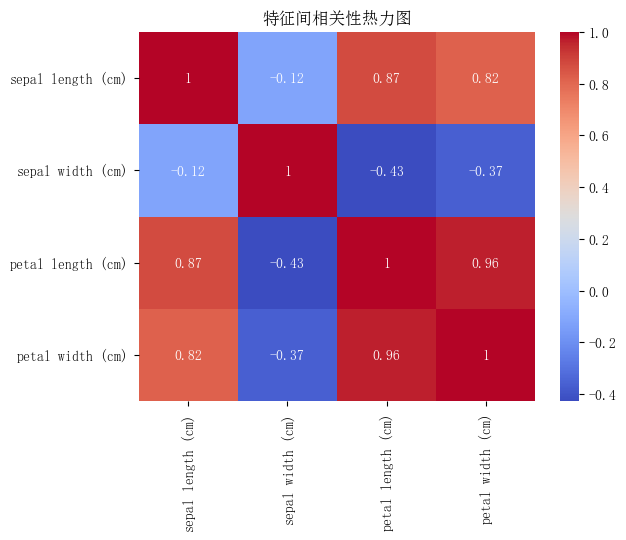

In [21]:
#计算相关系数矩阵
correlation = iris_df.iloc[:, :4].corr(method='pearson')
print("相关系数矩阵:\n",correlation)

#热力图可视化
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("特征间相关性热力图")
plt.show()

## 特征分布矩阵图

C:\app\anoconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


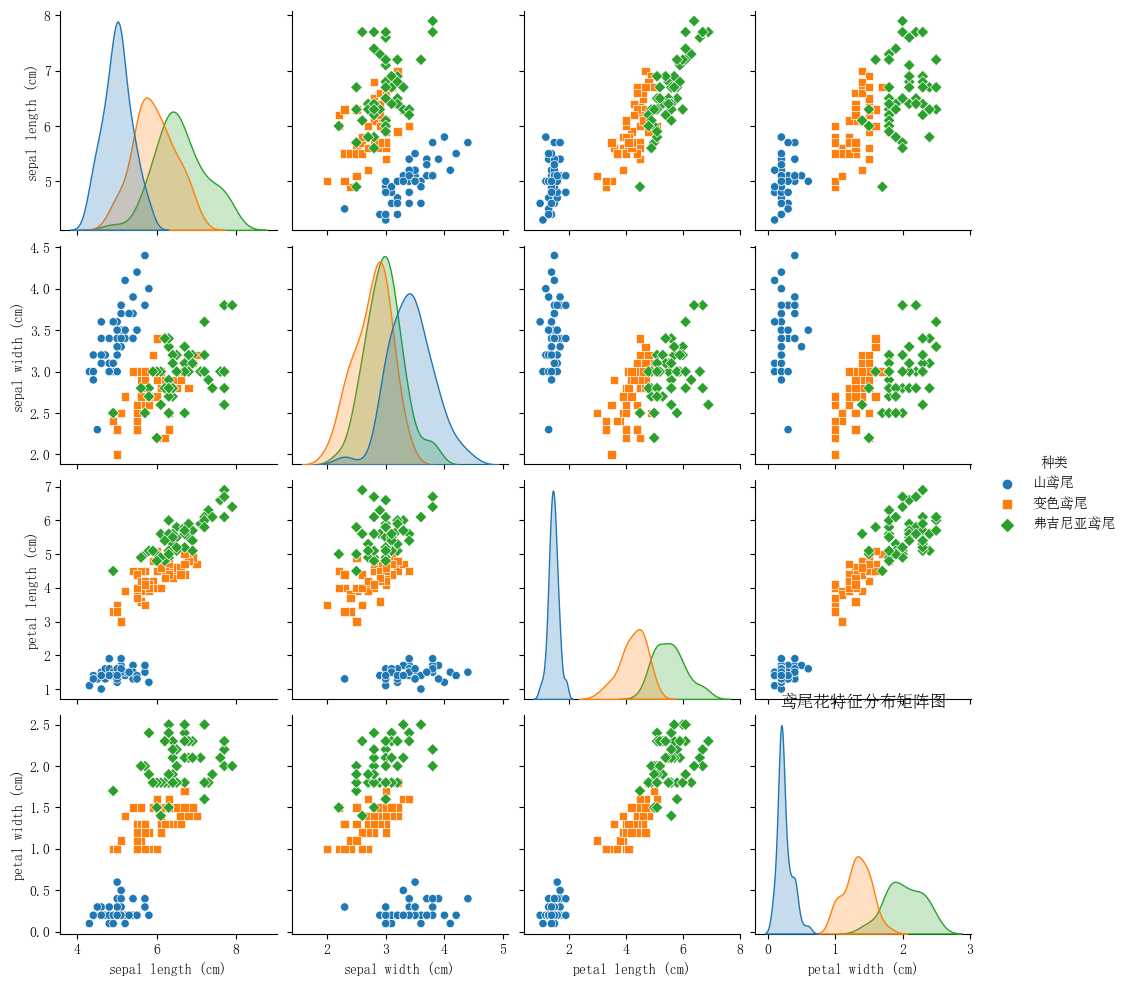

In [22]:
sns.pairplot(iris_df, hue='种类', markers=['o', 's', 'D'])
plt.title("鸢尾花特征分布矩阵图")
plt.show()

## 线性回归示例（花瓣长度 vs 花瓣宽度）

C:\app\anoconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


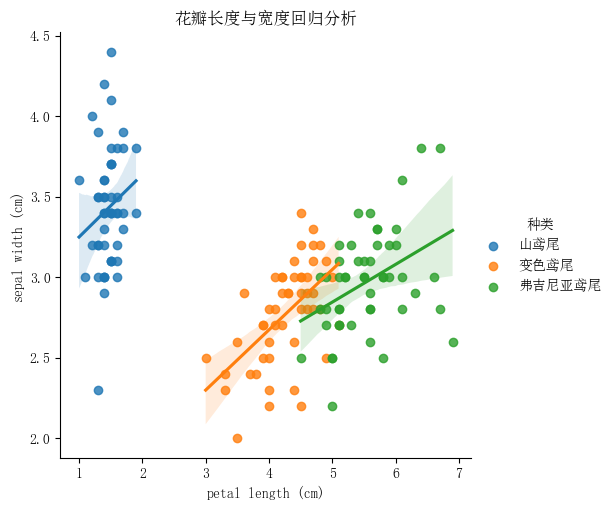

In [26]:
sns.lmplot(x='petal length (cm)', y='sepal width (cm)', data=iris_df, hue='种类')
plt.title("花瓣长度与宽度回归分析")
plt.show()